In [1]:
#Modules
import numpy as np
import numpy.matlib as nm
import matplotlib.pyplot as plt

## Dissimilarity analysis

#### Compute dissimilarity matrices

In [2]:
import scipy.spatial.distance as dist
import numpy as np
import itertools
import pandas as pd

# Prepare 3 vectors (data points) of 2 dimensions
points = pd.DataFrame(data={'id':['A', 'B', 'C'], 'dim1':[1, 2, 5], 'dim2':[1, 1, 5]})
display(points.head())

,id,dim1,dim2
0,A,1,1
1,B,2,1
2,C,5,5


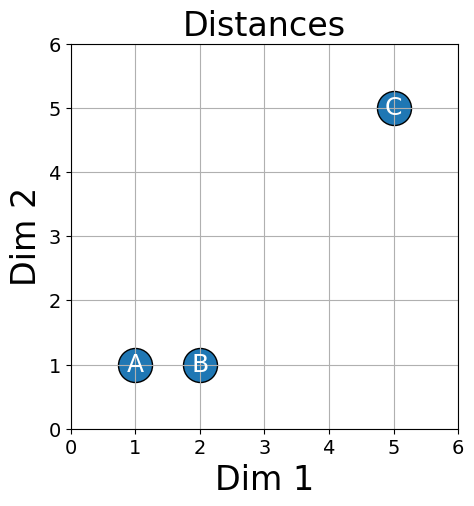

In [3]:
plt.figure(figsize=(5, 5))
plt.grid(True)

plt.scatter(points['dim1'], points['dim2'], s=600, marker='o', edgecolors='black');
plt.title("Distances", fontsize=24)
plt.xlabel('Dim 1', fontsize=24)
plt.ylabel('Dim 2', fontsize=24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(left=0, right=6)
plt.ylim(bottom=0, top=6)

for i, txt in enumerate(points['id']):
    plt.text(x=points['dim1'].iloc[i], y=points['dim2'].iloc[i], s=txt, fontsize=18, 
             horizontalalignment='center', verticalalignment='center', color='white');
    
plt.show();

## Different types of distnace metrics:

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Manhattan_distance.svg/1200px-Manhattan_distance.svg.png" width="500"/>
</div>

In [4]:
# Calculate the distance between A, B, and C combinations 

for combo in itertools.combinations(points['id'], 2):
    v1 = points[points['id'] == combo[0]][['dim1', 'dim2']]
    v2 = points[points['id'] == combo[1]][['dim1', 'dim2']]
    
    print('\nPoints {} and {}:'.format(combo[0], combo[1]))
    print('Manhattan (L1) distance: {:.2f}'.format(dist.cityblock(v1.values[0], v2.values[0])))
    print('Euclidean (L2) distance: {:.2f}'.format(dist.euclidean(v1.values[0], v2.values[0])))
    print('Chebyshev distance: {:.2f}'.format(dist.chebyshev(v1.values[0], v2.values[0])))
    print('Canberra distance: {:.2f}'.format(dist.canberra(v1.values[0], v2.values[0])))
    print('Cosine distance: {:.2f}'.format(dist.cosine(v1.values[0], v2.values[0])))
    
# for difference distance calculation methods, 
#see https://docs.scipy.org/doc/scipy/reference/spatial.distance.html#module-scipy.spatial.distance


Points A and B:
Manhattan (L1) distance: 1.00
Euclidean (L2) distance: 1.00
Chebyshev distance: 1.00
Canberra distance: 0.33
Cosine distance: 0.05

Points A and C:
Manhattan (L1) distance: 8.00
Euclidean (L2) distance: 5.66
Chebyshev distance: 4.00
Canberra distance: 1.33
Cosine distance: 0.00

Points B and C:
Manhattan (L1) distance: 7.00
Euclidean (L2) distance: 5.00
Chebyshev distance: 4.00
Canberra distance: 1.10
Cosine distance: 0.05


In [5]:
# Visulaize the dissimilarity martix

from sklearn.metrics.pairwise import pairwise_distances

s=nm.zeros((1,2))
for point in points['id']:
    v = points[points['id'] == point][['dim1', 'dim2']]
    s = nm.concatenate((s, v), axis=0) 
s=np.asarray(s[1:])
# generate dissimilarity matrix for L1, "Manhattan" or "taxicab"
d1 = pairwise_distances(s, metric='manhattan')

(3, 2) (3, 3)


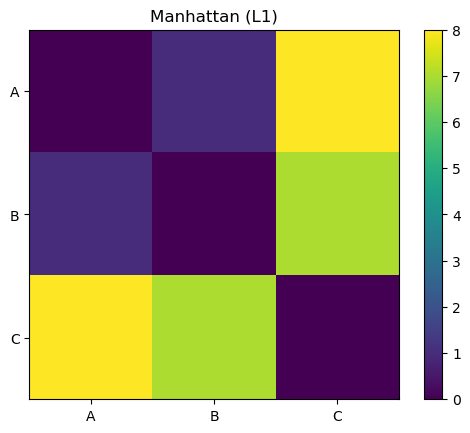

In [6]:
# plot the heatmap

# Manhattan (L1)
plt.figure()
plt.imshow(d1)
plt.title('Manhattan (L1)')
plt.colorbar()

# Create labels on the x axis
pos = np.arange(len(points['id']))
plt.xticks(pos, points['id'])
plt.yticks(pos, points['id'])

print(s.shape, d1.shape)

In [7]:
# generate dissimilarity matrix for L2, "Euclidean"
d2 = pairwise_distances(s, metric='euclidean')

# generate dissimilarity matrix for cosine metric.
d3 = pairwise_distances(s, metric='cosine')

([<matplotlib.axis.YTick at 0x1a7d23a6c70>,
 [Text(0, 0, 'A'), Text(0, 1, 'B'), Text(0, 2, 'C')])

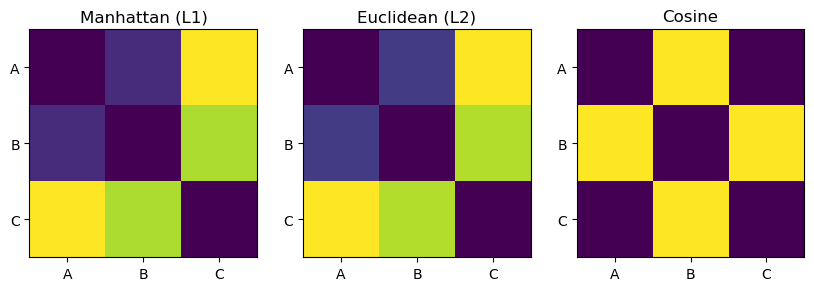

In [8]:
#%% Visualize Dissimilarity matrices and reflect why the plot looks the same/different

plt.figure(figsize = (10,10))

# L1, Manhattan
plt.subplot(1,3,1)
plt.imshow(d1)
plt.title('Manhattan (L1)')
# Create labels on the x axis
pos = np.arange(len(points['id']))
plt.xticks(pos, points['id'])
plt.yticks(pos, points['id'])

# Euclidean
plt.subplot(1,3,2)
plt.imshow(d2)
plt.title('Euclidean (L2)')
# Create labels on the x axis
pos = np.arange(len(points['id']))
plt.xticks(pos, points['id'])
plt.yticks(pos, points['id'])

# Cosine
plt.subplot(1,3,3)
plt.imshow(d3)
plt.title('Cosine')
# Create labels on the x axis
pos = np.arange(len(points['id']))
plt.xticks(pos, points['id'])
plt.yticks(pos, points['id'])


More in-depth reading on distance metrics / Data dissimilarity analysis:

https://towardsdatascience.com/17-types-of-similarity-and-dissimilarity-measures-used-in-data-science-3eb914d2681#:~:text=In%20data%20science%2C%20the%20similarity,are%20grouped%20into%20one%20cluster.

## Clustering Demo

<div>
<img src="https://i.ibb.co/mq78Kjw/clustering-flowchartpng.png" width="500"/>
</div>

### Generating dummy dataset to work with

In [9]:
# Generate dataset 1 from a Gasusian distribution (Normal)

x1 = nm.random.normal(loc = 0,scale = 1, size = (100,2))

Text(0.5, 1.0, 'DS1')

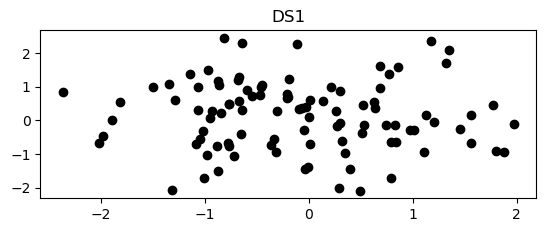

In [10]:
plt.subplot(2,1,2)
plt.plot(x1[:,0],x1[:,1],'ko')
plt.title('DS1')

In [11]:
# Generate dataset 2 from a Gasusian distribution (Normal)

x2 = nm.random.normal(loc = 0,scale = 1, size = (50,2))

Text(0.5, 1.0, 'DS2')

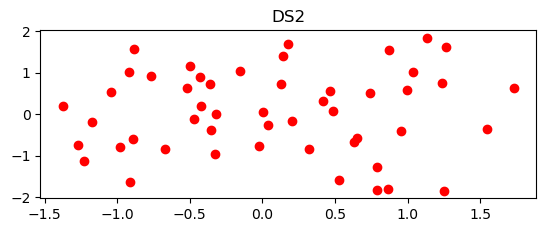

In [12]:
plt.subplot(2,1,2)
plt.plot(x2[:,0],x2[:,1],'ro')
plt.title('DS2')

Text(0.5, 1.0, 'Raw data')

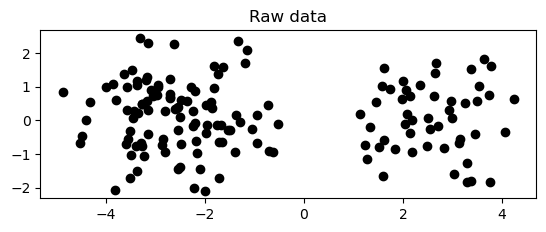

In [13]:
# Add the two datasets together. This will serves as our demo  dataset for clustering.

d = 5 # distance between the center of clusters

x1[:,0] = x1[:,0] - d/2
x2[:,0] = x2[:,0] + d/2
x = nm.concatenate((x1, x2), axis=0)

plt.subplot(2,1,2)
plt.plot(x1[:,0],x1[:,1],'ko')
plt.plot(x2[:,0],x2[:,1],'ko')
plt.title('Raw data')

Text(0.5, 1.0, 'Raw data - colored datasets')

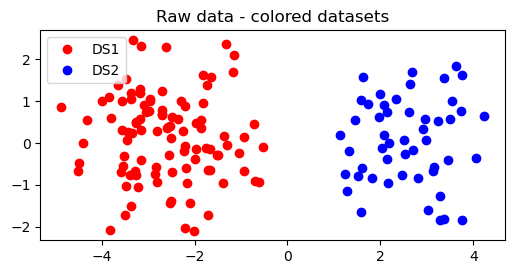

In [14]:
plt.figure(figsize = (6,6))
plt.subplot(2,1,1)
plt.plot(x1[:,0],x1[:,1],'ro',label="DS1")
plt.plot(x2[:,0],x2[:,1],'bo', label="DS2")
plt.legend()
plt.title('Raw data - colored datasets')

### K-means clustering

* Most popular clustering technique (not the only one though!)
* How does it work?
    * Starts with an **initial guess** for the number of clusters (K) and random (not necessarily random!) center positions list.
    * Each  point is initally assigned to its nearest cluster centre.
    * For each cluster/segment, the point is moved to the **centroid** of the clustered points.
    * The process is repeated until convergance (measured by the  sum of squares within the clusters- the total squared distance between each point and its cluster centre should below a certain threshold)


<div>
<img src="img/kmeans.gif" width="700">
</div>
Source: https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/

In [15]:
# If you get an error running KMeans in the cell below, upgrade threadpoolctl to >3.0 by running the command below
#!pip install threadpoolctl --upgrade

C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, '2 clusters')

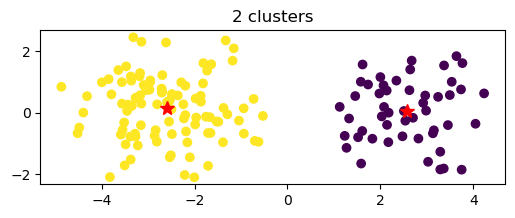

In [16]:
# Using K-means "centroid" to find clusters

from sklearn.cluster import KMeans

k = 2 # Number of clusters, you can use an intial guess. We will conduct a cluster number analysis to determine k.
clusters = KMeans(n_clusters=k, init = 'random').fit(x)
L = clusters.labels_
cluster_centers = clusters.cluster_centers_

plt.figure(figsize = (6,2))
plt.scatter(x[:,0], x[:,1], c = L)
plt.plot(cluster_centers[:,0],cluster_centers[:,1],'r*',markersize = 10)
plt.title( str(k) + ' clusters')



* Can we select a better staring point for assigning centers? **Yes**
* By setting the method to **kmeans++** instead of "random", the initial centres are smartly selected.

* How does it work? 
    * k-means++ assigns the first centroid to the location of a randomly selected data point
    * Chooses the subsequent centroids from the remaining data points based on a probability proportional to the squared distance away from a given point's nearest existing centroid. 
    * The effect is an attempt to push the centroids as far from one another as possible, covering as much of the occupied data space as they can from initialization.
    
Source: http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf

C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, '2 clusters')

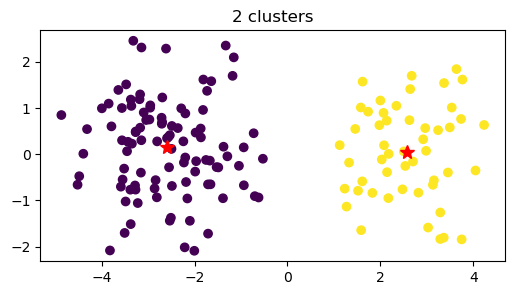

In [17]:
k = 2 # Number of clusters, you can use an intial guess. We will conduct a cluster number analysis to determine k.
clusters = KMeans(n_clusters=k, init = 'k-means++').fit(x)
L = clusters.labels_
cluster_centers = clusters.cluster_centers_

plt.figure(figsize = (6,3))
plt.subplot(1,1,1)
plt.scatter(x[:,0], x[:,1], c = L)
plt.plot(cluster_centers[:,0],cluster_centers[:,1],'r*',markersize = 10)
plt.title( str(k) + ' clusters')

### K-medoids

* K-medoid uses medoids (median) as centers for the cluster instead of average centers (mean)
* Median will assign an actual data point from the dataset as the center instead of an averaged value.
* Could you think of examples where the center has to be a data point?

In [18]:
# the package needed!
#!pip install scikit-learn-extra

Text(0.5, 1.0, '2 clusters using KMedoids')

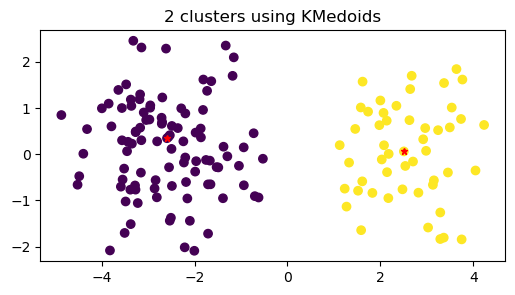

In [19]:
# Using K-medoids "centroid" to find clusters

from sklearn_extra.cluster import KMedoids

k = 2 # Number of clusters, you can use an intial guess. We will conduct a cluster number analysis to determine k.
clusters = KMedoids(n_clusters=k).fit(x)
L = clusters.labels_
cluster_centers = clusters.cluster_centers_

plt.figure(figsize = (6,3))
plt.subplot(1,1,1)
plt.scatter(x[:,0], x[:,1], c = L)
plt.plot(cluster_centers[:,0],cluster_centers[:,1],'r*',markersize = 5)
plt.title( str(k) + ' clusters using KMedoids')

In [20]:
cluster_centers

array([[-2.59177508,  0.34697234],
       [ 2.50536701,  0.06103311]])

### Choosing the right number for K

[1] Experiment with K values

C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


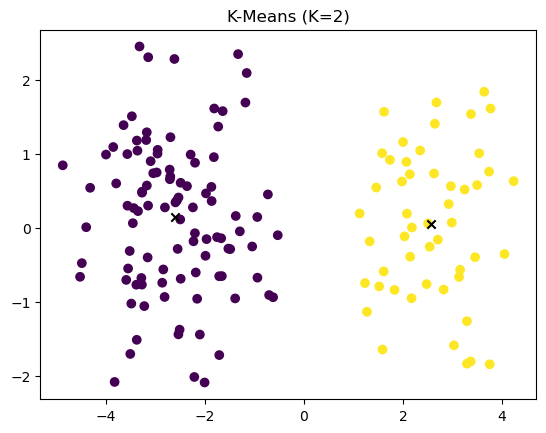

C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


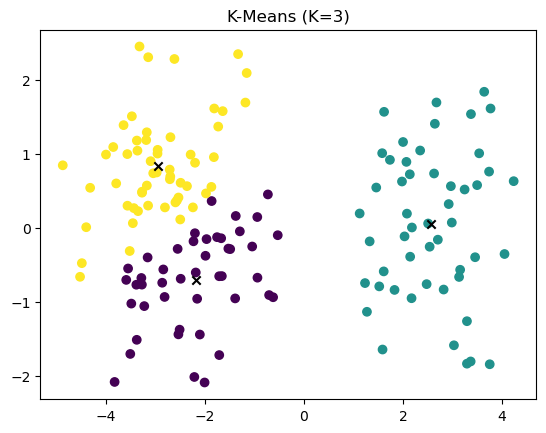

C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


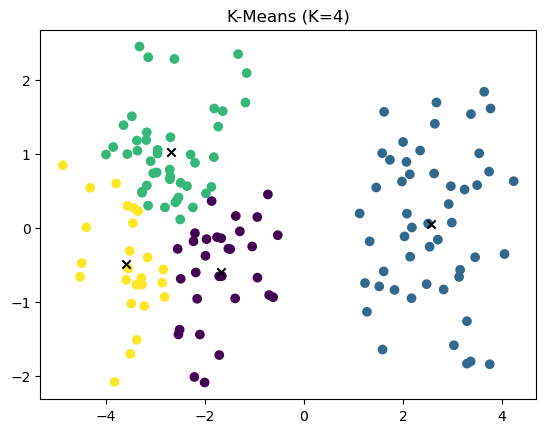

In [21]:
def do_kmeans(X, k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(X)

    plt.figure();
    plt.scatter(x[:, 0], x[:, 1], c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")
    plt.title("K-Means (K={})".format(k));
    plt.show()

for k in range(2, 5):
    do_kmeans(x, k)

[2] The elbow method: finding the inertia

**Inertia**: Sum of distances of samples to their closest cluster center (within-cluster sum-of-squares)

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$$

C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known t

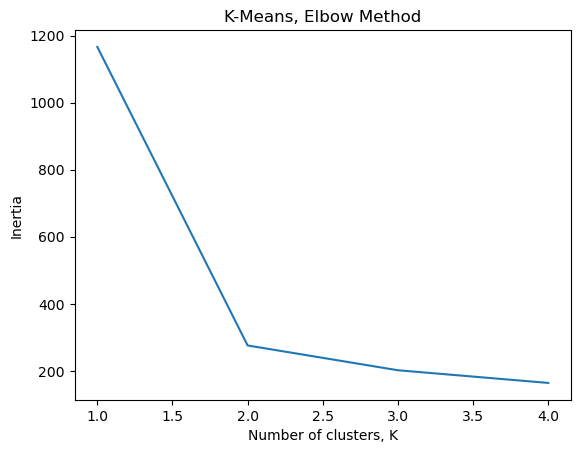

In [22]:
inertias = {}

for k in range(1, 5):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(x)
    inertias[k] = kmeans.inertia_ 
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");

## Spectral Clustering 

### Can K-means work with the all types of datasets?
<img src="img/spectral.png" width="400" />

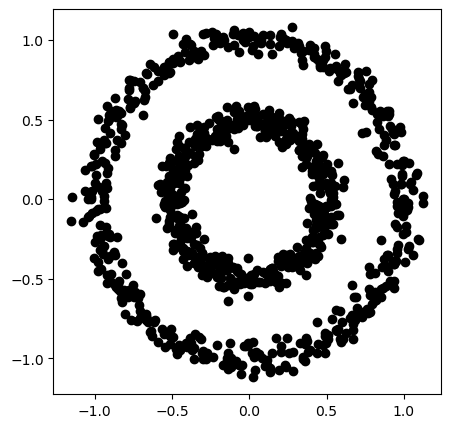

In [23]:
from sklearn import datasets

x = datasets.make_circles(n_samples=1000, factor=0.5, noise=.05)[0]

plt.figure(figsize = (5,5))
plt.subplot(1,1,1)
plt.scatter(x[:,0], x[:,1], c="black")

C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, '6 clusters')

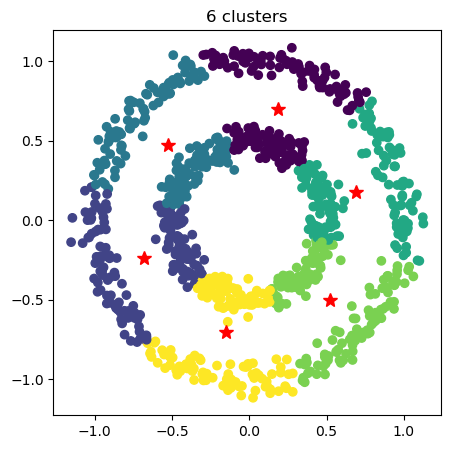

In [24]:
k = 6 # Number of clusters, you can use an intial guess. We can conduct a cluster number analysis to determine k.
clusters = KMeans(n_clusters=k, init = 'random').fit(x)
L = clusters.labels_
cluster_centers = clusters.cluster_centers_

plt.figure(figsize = (5,5))
plt.subplot(1,1,1)
plt.scatter(x[:,0], x[:,1], c = L)
plt.plot(cluster_centers[:,0],cluster_centers[:,1],'r*',markersize = 10)
plt.title( str(k) + ' clusters')

Text(0.5, 1.0, '2 clusters')

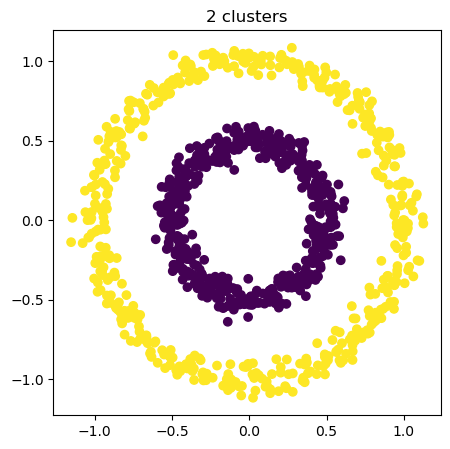

In [25]:
from sklearn.cluster import SpectralClustering
k = 2 # Number of clusters, you can use an intial guess. We can conduct a cluster number analysis to determine k.
clusters_sp = SpectralClustering(n_clusters=k,gamma=100.0).fit(x)
L = clusters_sp.labels_

plt.figure(figsize = (5,5))
plt.subplot(1,1,1)
plt.scatter(x[:,0], x[:,1], c = L)
plt.title( str(k) + ' clusters')

## More on clustering

<img src="img/types_of_clusters.png" width="900" />

Source: https://scikit-learn.org/stable/modules/clustering.html

# Case Study - XRD Clustering

![flowchart](https://i.ibb.co/C6Chgbw/clustering-example-flowchartpng.png)

In [26]:
import scipy.io as sio
import numpy.matlib as nm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import scipy
import sklearn

In [27]:
# tested working on the following versions:
# pd.__version__ #1.4.4
# mpl.__version__ #3.4.3
# np.__version__ #1.22.4
# scipy.__version__ #1.7.1
# !pip --version #21.2.4
# sklearn.__version__ #1.1.2

## Visualize the data

In [28]:
# check what's in your current file directory (linux & macos)
#!ls
# check what's in your current file directory (windows)
!dir /b

FeGaPd_Exp_CMP.txt
FeGaPd_Exp_XRD.txt
gap_MLMR.py
img.zip
data.zip
P4-Unsupervised_learning.ipynb
img
A4
__pycache__
.ipynb_checkpoints
obs
images.pptx
clustering_flowchartpng.png
clustering_example_flowchartpng.png


In [29]:
# Reading the data from the text file into pd dataframe
df = pd.read_csv('FeGaPd_Exp_CMP.txt', delimiter=' ')
df = df.dropna(axis=1)
df = df.rename(columns={"Fe\t\t":"Fe","Ga\t\t":"Ga"})
df_cmp = df
df_cmp

,Fe,Ga,Pd
0,0.8216,0.1285,0.0499
1,0.8286,0.1164,0.0550
2,0.8435,0.1006,0.0559
3,0.8520,0.0922,0.0559
4,0.8556,0.0702,0.0742
...,...,...,...
273,0.4361,0.4200,0.1439
274,0.4379,0.4362,0.1259
275,0.4458,0.4526,0.1016
276,0.4487,0.4652,0.0861


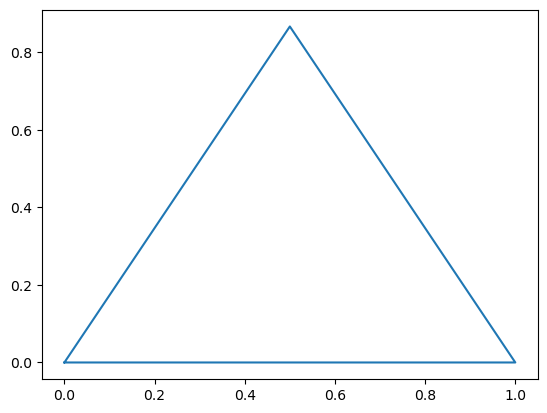

In [30]:
# Plotting the ternary phase diagram

# step 1: plot an equilateral triangle
plt.figure(1)
plt.plot([0,1,0.5,0],[0,0,nm.sqrt(.75),0]) 

In [31]:
cmp = df_cmp.to_numpy()
print(cmp[0,0],cmp[0,1])

0.8216 0.1285


Text(0, 0.5, 'Ga')

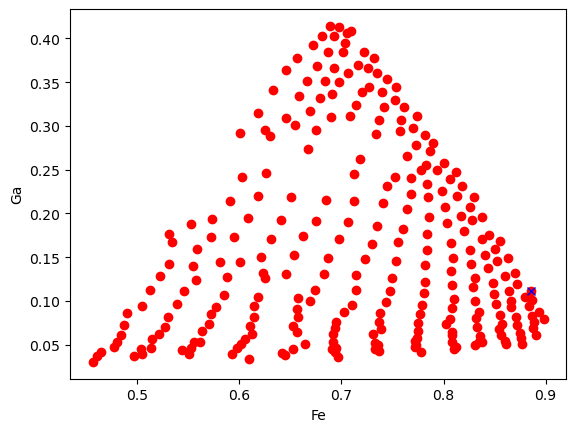

In [32]:
# step 2: project composition values on the triangle

xy = nm.zeros((cmp.shape[0],2)) # the array will have a shape 278 x 2 filled with zero values

xy[:,1] = nm.array(cmp[:,1]*0.8660,ndmin = 2).T # project Ga composotion on one side of the triangle
xy[:,0] = (cmp[:,0]+xy[:,1].T*0.5774).T # project Fe composotion on the other side of the triangle

plt.plot(xy[:,0],xy[:,1],'ro')
plt.plot(0.8216+(0.1285*0.8660*0.5774),0.1285*0.8660,'bx') #plotting the first composition for visulaization
plt.xlabel('Fe')
plt.ylabel('Ga')

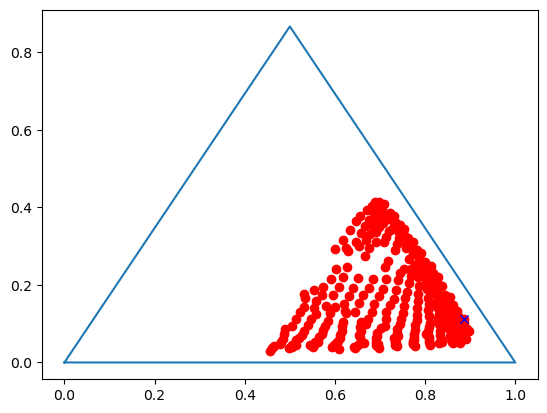

In [33]:
#step 3: do it all in one step to get the ternary phase diagram

plt.figure(1)
plt.plot([0,1,0.5,0],[0,0,nm.sqrt(.75),0]) 
plt.plot(xy[:,0],xy[:,1],'ro')
plt.plot(0.8216+(0.1285*0.8660*0.5774),0.1285*0.8660,'bx') #plotting the first composition for visulaization

In [34]:
## Let us plot a fancy ternary phase diagram!
#Module needed for plotting
#!pip install python-ternary 

In [35]:
import ternary

def plot_ternary(data, c='r'):

    scale = 100
    figure, tax = ternary.figure(scale=scale)

    # Draw Boundary and Gridlines
    tax.boundary(linewidth=2.0)
    tax.gridlines(color="blue", multiple=10)

    # Set Axis labels and Title
    fontsize = 12
    offset = 0.14
    tax.right_corner_label('Pd', fontsize=fontsize, offset=0.2, fontweight='bold')
    tax.top_corner_label('Ga', fontsize=fontsize, offset=0.23, fontweight='bold')
    tax.left_corner_label('Fe', fontsize=fontsize, offset=0.2, fontweight='bold')
    tax.left_axis_label("at.%", fontsize=fontsize, offset=offset)
    tax.right_axis_label("at.%", fontsize=fontsize, offset=offset)
    tax.bottom_axis_label("at.%", fontsize=fontsize, offset=offset)
    tax.ticks(axis='lbr', multiple=10, linewidth=1, offset=0.025, clockwise= True)
    tax.get_axes().axis('off')
    tax.clear_matplotlib_ticks()
    
    tax.scatter(data, alpha=1, edgecolors='none', s=30, c=c)

C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\ternary\plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


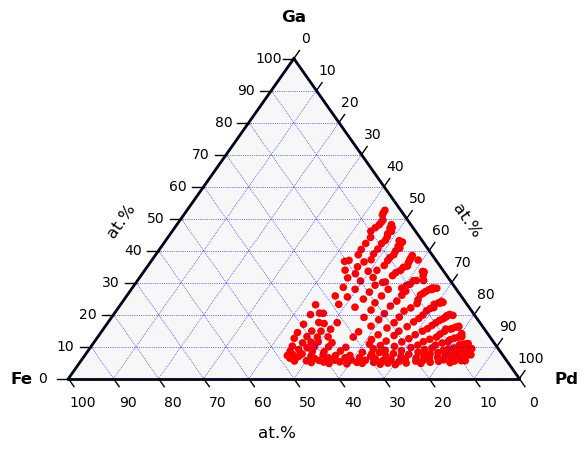

In [36]:
points=nm.vstack((cmp[:,0].T*100,cmp[:,2].T*100)).T #combining the two arrays of Fe and Pd compositions as pairs of (x,y)
plot_ternary(points)
# plot_ternary(([10,40],))

##### Alternative method for plotting ternary diagram

check: https://plotly.com/python/ternary-plots/

[0.8216 0.1285 0.0499]


Text(0, 0.5, 'xrd')

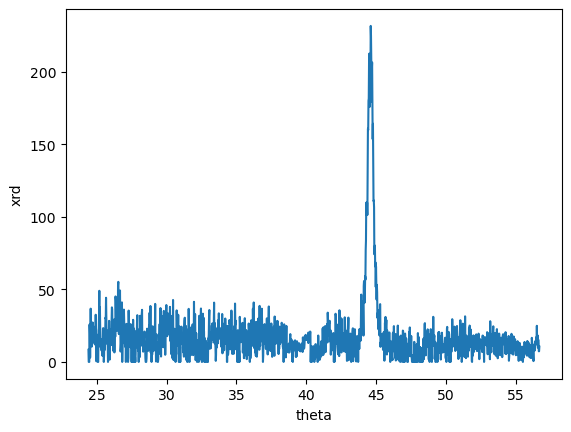

In [37]:
## plot the XRD pattern of one certain composition point

print(cmp[0])

df = pd.read_csv('FeGaPd_Exp_XRD.txt', delimiter=' ', header=None)
df = df.dropna(axis=1)
df_xrd = df[1:]
df_tth = df[:1]
xrd = df_xrd.to_numpy()
tth = df_tth.to_numpy()[0]

plt.plot(tth,xrd[0])
plt.xlabel('theta')
plt.ylabel('xrd')

In [38]:
df_tth

,2,4,6,8,10,12,14,16,18,20,...,3214,3216,3218,3220,3222,3224,3226,3228,3230,3232
0,24.4,24.42,24.44,24.46,24.48,24.5,24.52,24.54,24.56,24.58,...,56.52,56.54,56.56,56.58,56.6,56.62,56.64,56.66,56.68,56.7


In [39]:
df_xrd

,2,4,6,8,10,12,14,16,18,20,...,3214,3216,3218,3220,3222,3224,3226,3228,3230,3232
1,8.382627,0.000000,0.000000,0.000000,25.800794,19.658350,3.003477,17.097394,36.734059,21.131175,...,24.909311,13.925944,14.088682,18.245424,9.807668,15.344213,12.352056,7.350596,7.348131,10.524658
2,8.988942,2.475641,12.881720,0.000000,12.006355,21.533429,8.941757,16.636873,10.111131,17.995865,...,15.120809,8.116608,13.373824,16.306156,22.604601,14.039557,19.980824,17.176698,12.225978,10.871862
3,6.807065,14.745632,13.713368,6.433173,12.811721,11.892668,15.596443,12.993008,8.869378,19.145289,...,19.892344,14.294275,15.073079,14.529755,15.383401,20.441115,16.300396,14.232041,14.448748,7.521917
4,15.580354,21.383568,0.680666,7.566008,7.242573,19.399226,0.000000,5.550276,6.321862,22.591757,...,13.643148,9.996442,6.930872,16.755038,19.088238,14.183369,12.414332,14.380423,11.581842,12.015786
5,7.816374,6.723947,24.616683,6.075458,6.978225,13.321617,11.986473,8.156838,6.473731,17.948115,...,8.531211,14.101795,10.253531,9.487319,15.896556,15.648940,13.074471,12.510846,13.512364,18.879022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,13.730826,34.524098,18.415748,17.908711,22.275827,6.104009,5.669727,8.719814,3.464610,16.924710,...,20.087490,6.474895,14.730961,16.905384,7.758663,17.395397,11.414284,16.199921,8.619008,8.744741
275,0.000000,3.995857,3.758555,11.005174,5.943578,18.072264,7.839823,15.778816,19.909387,28.163357,...,15.540332,10.174167,8.895774,11.533253,7.781700,13.178014,12.128393,8.617035,8.039639,9.864601
276,10.836974,28.272935,33.491767,13.956242,12.446050,1.572761,4.652168,8.890458,0.000000,0.573343,...,11.520374,4.056416,6.981422,12.753489,10.879917,16.449802,11.747243,18.781638,17.414185,11.113282
277,19.166804,21.174803,13.305079,0.000000,4.301264,2.698208,4.440096,8.049067,19.188626,24.292740,...,11.326216,7.033424,12.407411,14.371474,16.218110,19.364819,12.177697,14.059042,10.166353,11.179127


In [40]:
df_tth.iloc[0]

2       24.40
4       24.42
6       24.44
8       24.46
10      24.48
        ...  
3224    56.62
3226    56.64
3228    56.66
3230    56.68
3232    56.70
Name: 0, Length: 1616, dtype: float64

(278, 1616)


Text(0, 0.5, 'material points')

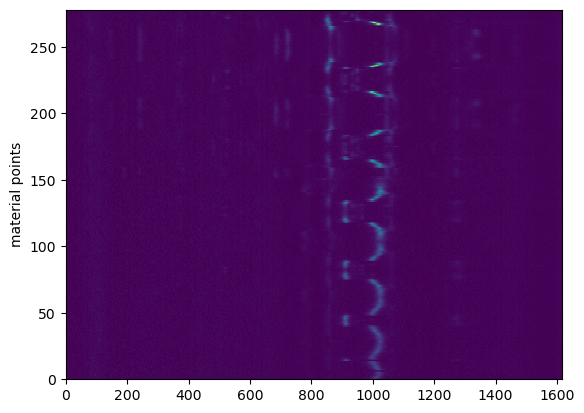

In [41]:
## plot all XRDs in a heatmap

print(xrd.shape)
plt.figure()
plt.pcolor([x for i,x in enumerate(xrd) if i not in []])
plt.ylabel('material points')

In [42]:
# generate dissimilarity matrix for XRD points

from sklearn.metrics.pairwise import pairwise_distances
from scipy.spatial.distance import correlation

s = np.array(xrd)

# generate dissimilarity matrix for L1, "cityblock" or "taxicab"
d1 = pairwise_distances(s, metric='manhattan')

# generate dissimilarity matrix for L2, "Euclidean"
d2 = pairwise_distances(s, metric='euclidean')

# generate dissimilarity matrix for cosine metric.
d3 = pairwise_distances(s, metric='cosine')

d4 = pairwise_distances(s, metric='correlation')

Text(0.5, 1.0, 'Correlation')

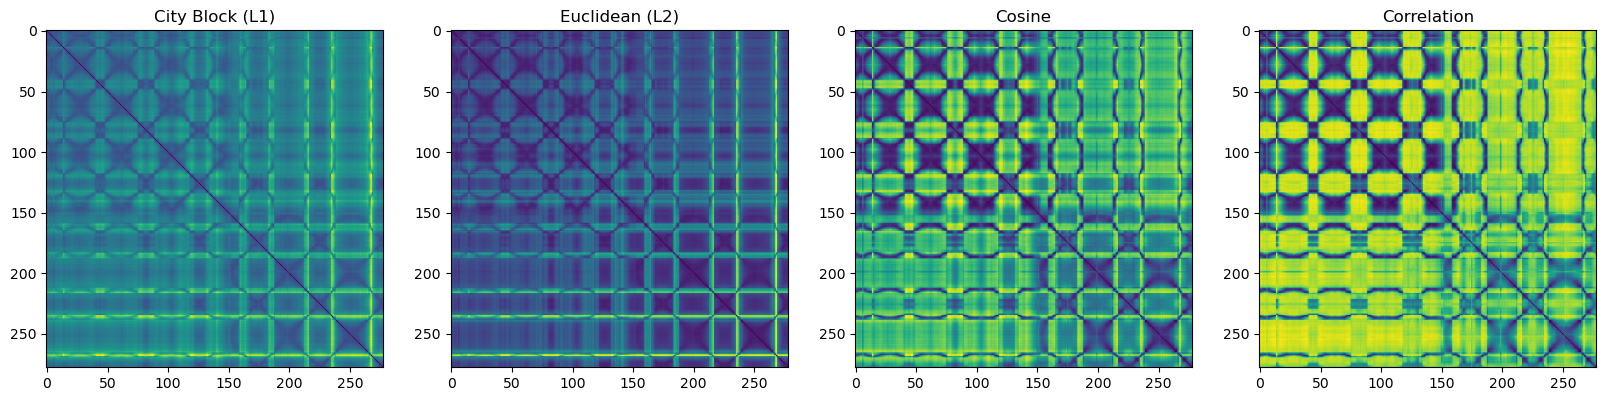

In [43]:
# visulaize the dissimilarity matrices

# L1, Manhattan
plt.figure(3, figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(d1)
plt.title('City Block (L1)')

# Euclidean
plt.subplot(1,4,2)
plt.imshow(d2)
plt.title('Euclidean (L2)')

# And Cosine
plt.subplot(1,4,3)
plt.imshow(d3)
plt.title('Cosine')

plt.subplot(1,4,4)
plt.imshow(d4)
plt.title('Correlation')

## Pricinple component analysis (PCA)

#### Visulazing in lower dimensionality

Read: https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

<img src="https://miro.medium.com/max/1200/1*V3JWBvxB92Uo116Bpxa3Tw.png" />

Source: https://vitalflux.com/pca-explained-variance-concept-python-example/


## PCA of XRD points

278 1616 278


Text(0, 0.5, 'PCA 2')

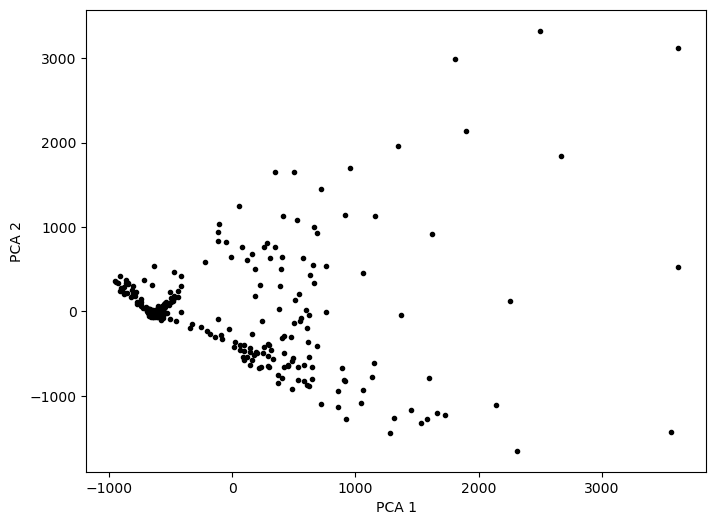

In [45]:
# PCA Analysis

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.decomposition import PCA

n_components = min(len(xrd[:,0]), len(xrd[0,:]))
print(len(xrd[:,0]), len(xrd[0,:]), n_components)

pca = PCA(n_components)
pca.fit(xrd)
loading_vectors = pca.components_
explained_variance = pca.explained_variance_
pos = pca.transform(xrd)


plt.figure(4, figsize=(8,6))
plt.plot(pos[:,0],pos[:,1],'k.')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [46]:
#PCA1
pos[:,0]

#PCA2
pos[:,1]

#PCA3
pos[:,2]

#PCAn (n [1,278])
#pos[:,n-1]

array([    3.16744618,   -28.84600948,   -42.53636041,   -36.24024499,
         -66.37594548,   -87.74059957,    72.74548693,   -60.16094552,
         -59.13553539,   -30.15397541,    13.94972824,    20.9644489 ,
          46.0473208 ,    27.1438335 ,  -711.36199374,  -472.22636273,
         -70.70271715,    54.37991151,    43.30443713,    34.87543889,
         -24.84416505,   -54.62440062,   -66.42276478,   -41.05237358,
         -64.29363014,   -66.63650538,   -43.09374784,   -19.7318812 ,
         -45.20852118,   -65.3269972 ,   -37.51322816,   -71.15830115,
         -53.74847972,   -82.41144034,   -87.03093419,   -53.67153204,
         -15.86280519,    38.0237574 ,    65.31520182,    26.48773193,
        -309.67463559,  -731.14606164,  -895.12465646,  -839.12062918,
        -642.4490328 ,  -875.18184975,  -972.71261881,  -873.53828288,
        -565.86854811,  -100.76477134,    47.43697678,    58.53632894,
           2.5629539 ,   -53.77027094,   -96.32433945,   -94.77317614,
      

In [47]:
pca.explained_variance_ratio_.max()

0.39711127070426155

#### Using SCREE plots - How much variance are we capturing by the principle components?

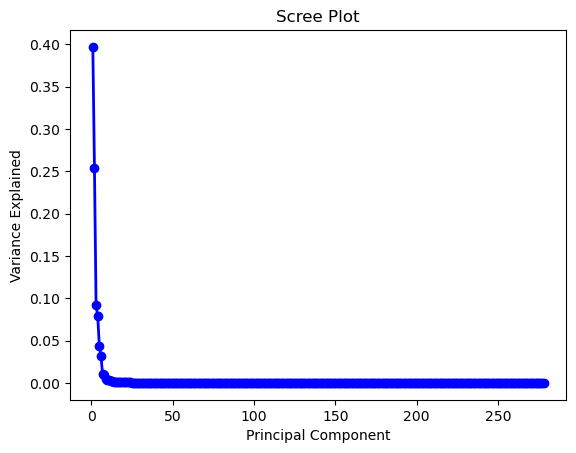

In [48]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

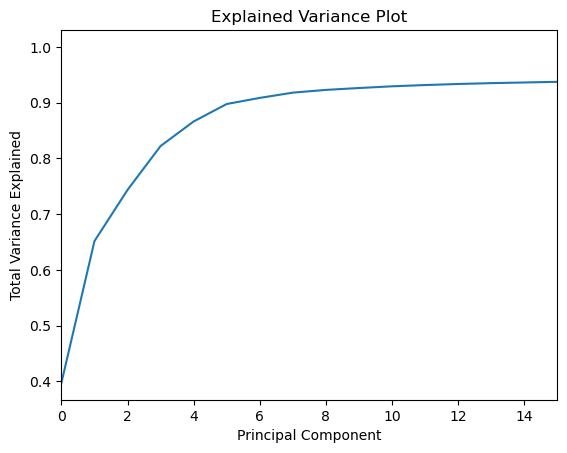

In [49]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance Plot')
plt.xlabel('Principal Component')
plt.ylabel('Total Variance Explained')
plt.xlim(0,15)
plt.show()

## Clustering

### Perform interia analysis to determine number of clusters k

C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known t

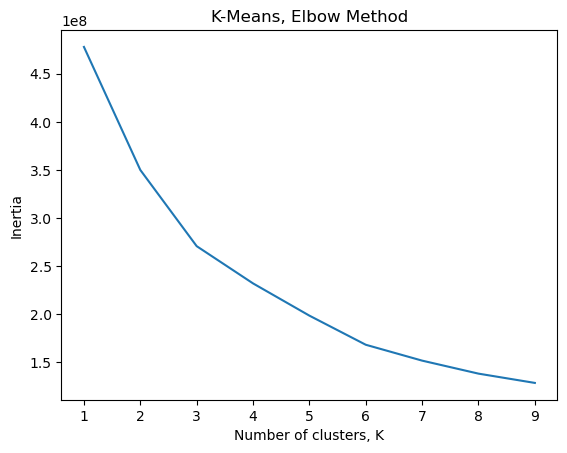

In [50]:
from sklearn.cluster import KMeans

inertias = {}

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pos)
    inertias[k] = kmeans.inertia_ 
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");

Alternative method to inertia
Gap Statistic: Identify the optimal number of clusters

https://hastie.su.domains/Papers/gap.pdf

gap_MLMR.py as developed by the MLMR team: https://www.nanocenter.umd.edu/events/mlmr-2021/

### Perform clustering

C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0, 0.5, 'PC2')

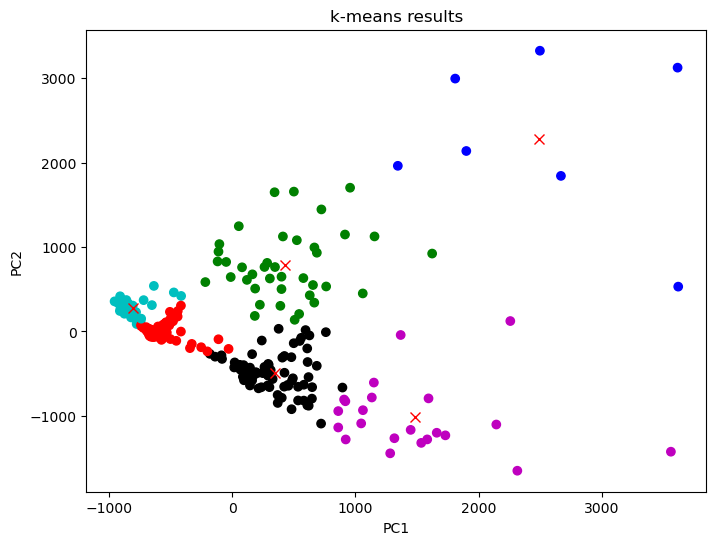

In [51]:
k = 6
kmeans = KMeans(n_clusters=k, random_state = 0).fit(pos)
L = list(kmeans.labels_)
# assign colours to the labels
clist = ['r','g','b','k','c','m','y'] # for up to 7 colors
for cl in range(k):
    L = [clist[cl] if i==cl else i for i in L]
    
cluster_centers = kmeans.cluster_centers_
plt.figure(figsize = (8,6))
plt.subplot(1,1,1)
# plt.cla()
plt.scatter(pos[:,0],pos[:,1],c = L)
plt.plot(cluster_centers[:,0], cluster_centers[:,1], 'rx', markersize=7)
plt.title('k-means results')
plt.xlabel('PC1')
plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

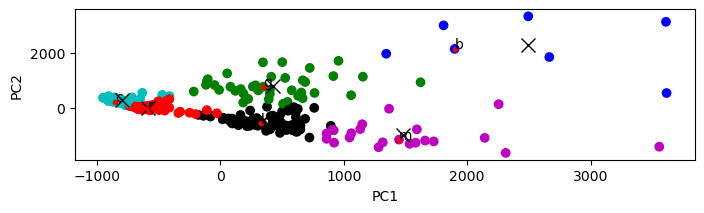

In [52]:
# find the distance between the cluster centers and the cluster points
d = pairwise_distances(nm.concatenate((cluster_centers, pos), axis=0))

# plot the cluster centers and indicate which point is closest to each center.
plt.figure(1, figsize = (8,16))
plt.subplot(k+1,1,1)
plt.scatter(pos[:,0],pos[:,1],c =L)
plt.plot(cluster_centers[:,0],cluster_centers[:,1],'kx',markersize=10)

# find the cluster points closest to the cluster centers
i = 1
while i < (k+1):
    cluster_rep = nm.argmin(d[i-1,k:],axis = 0)
    plt.plot(pos[cluster_rep,0], pos[cluster_rep,1],'r.')
    plt.annotate(str(L[cluster_rep]), (pos[cluster_rep,0], pos[cluster_rep,1]))
    i+=1
plt.xlabel('PC1')
plt.ylabel('PC2')    

C:\Users\93xsh\AppData\Local\Temp\ipykernel_22288\2908539580.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


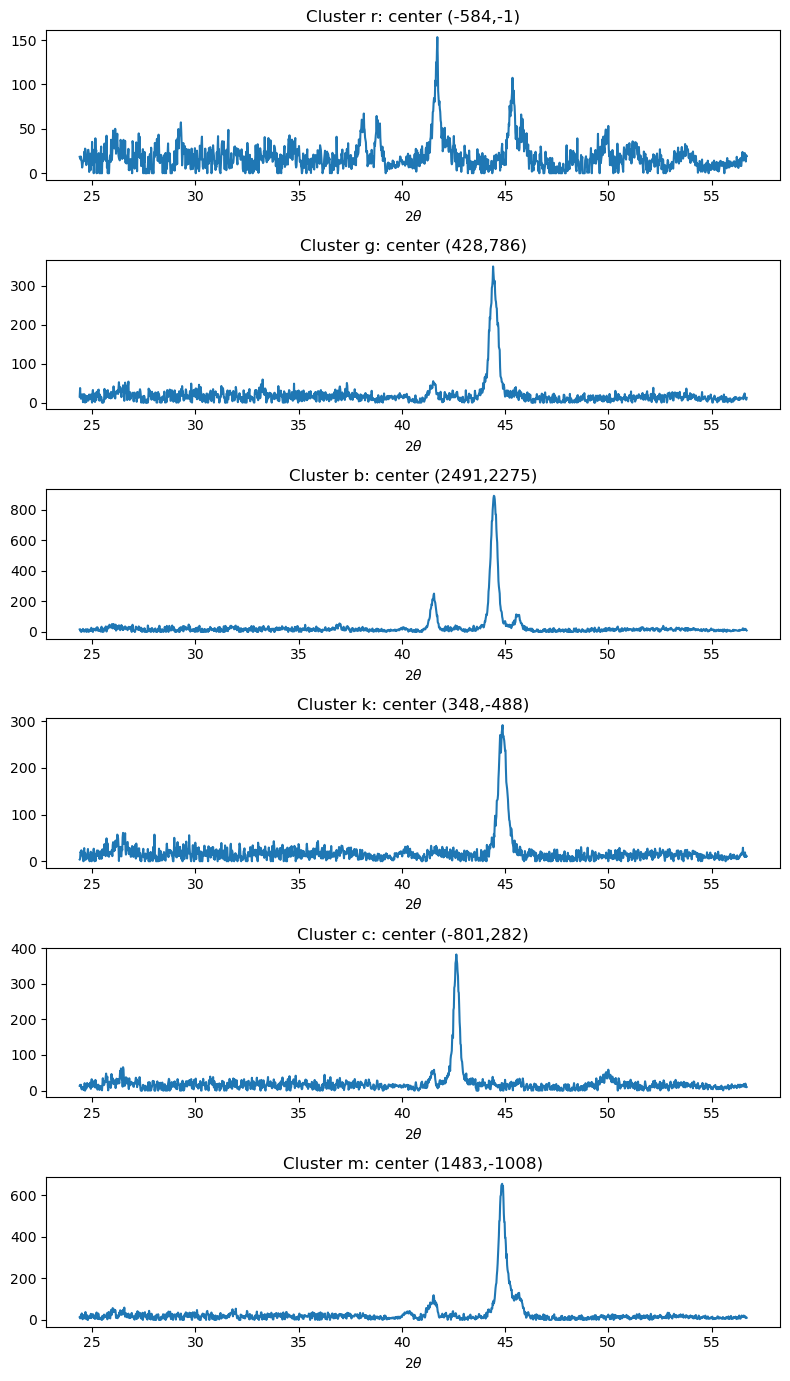

In [53]:
# plot the XRD for the sample closest to each cluster center
plt.figure(k, figsize = (8,16))
i=1
while i < (k+1):
    cluster_rep = nm.argmin(d[i-1,k:],axis = 0)
    plt.subplot(k+1,1,i+1)
    plt.title('Cluster ' + str(L[cluster_rep]) + ': center ('+str(int(cluster_centers[i-1,0]))+','+str(int(cluster_centers[i-1,1]))+')')
    plt.plot(nm.ravel(tth), s[cluster_rep,:])
    plt.xlabel(r'2$\theta$')
    plt.tight_layout()
    i+=1

C:\Users\93xsh\anaconda3\envs\mse_1065\lib\site-packages\ternary\plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


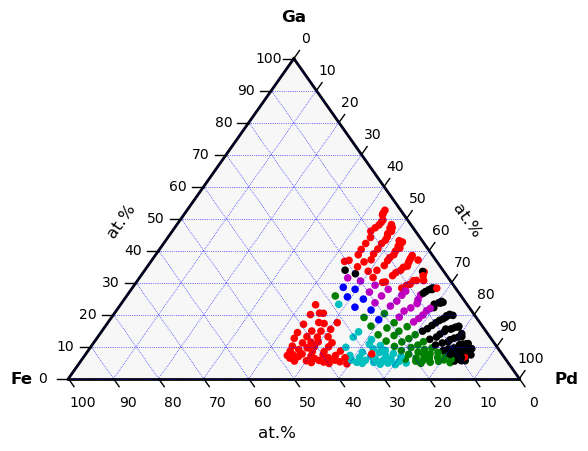

In [54]:
points=nm.vstack((cmp[:,0].T*100,cmp[:,2].T*100)).T #combining the two arrays of Fe and Pd compositions as pairs of (x,y)
plot_ternary(points,c=L)